In [1]:
import warnings
warnings.filterwarnings('ignore')

# Markdown
* a document formatting approach that makes writing documentations pretty easy
* can do markdown outside of jupyter 
    * filename `somefile.md`
* you can make code cells using three tic

```python
def example_function(x):
    return f'I am {x}'
```
Markdown Guide
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

keyboard short cut esp + M


# Let's consider a scatterplot
* at different level of complexity
        * complexity can refer to number of feathres, width of matrix, etc
        * complexity here can just mean order of the polynomial
        
$$
f(x) = ax**4 + bx**3 + cx**2 + dx + C
$$

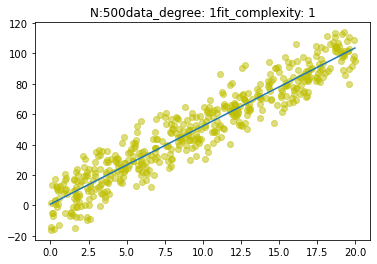

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scatter_fit(num_samps=50, fit_complexity=1, degree=1):
    N = num_samps
    
    np.random.seed(seed=23)
    
    # gen random x val
    x= np.random.rand(N)*20
    
    # define polynomial
    if degree == 1:
        y = 5*x + 3
    elif degree == 2:
        y = 3*x**2 + 5*x + 3
    elif degree == 3:
        y = -0.2*x**3 + 3*x**2 + 5*x + 3
    elif degree == 4:
        y = 0.006*x**4 + -0.2*x**3 + 3*x**2 + 5*x + 3

    
    # help us draw a fit line
    fit = np.polyfit(x, y, 1)
    fit_fn = np.poly1d(fit)
    
    # get scatter range
    y_val_range = np.ptp(y)
    
    y = [pt + np.random.normal(loc=0.0, scale=((1./10.) * y_val_range)) for pt in y]
    
    # line we draw
    fit_complexity_ = fit_complexity
    regr = np.poly1d(np.polyfit(x, y, fit_complexity_))(np.unique(x))
    
    #plot
    plt.title('N:{}'.format(N) + \
             'data_degree: {}'.format(degree) + \
             'fit_complexity: {}'.format(fit_complexity))
    
    plt.scatter(x, y, c='y', alpha =0.5)
    plt.plot(np.unique(x), regr)
    
    plt.show()

plot_scatter_fit(num_samps=500, fit_complexity=1, degree=1)





### Occam's Razor
does a simpler model efectively explain the data/discoveer a signal i relation to a more complex model>
* choose the simpler model that gets the job done effectively

<br><br>
# Apply Cross Val to Classification Problem
* using the Iris Dataset
* Apply KNN, simple/naive algo

# KNN(K-Nearest Neighbor)
* KNN is supervised
    * x and y data
* KNN is non-parametric
    * potemtial to interpret non-linear data signal
* KNN training data is essentially the fit model
    * must store data/ model in memory
    * prediction is comutationally expensive
* KNN prediction is a majority vote b/n the k most similar instance on a yet unseen data point
   

## Basic Algorith for KNN

```
Given a structured data set:
    set value of k
    for each data point:
        find k most similar data points
        check class of each of k similar data points
        assume current data point is of the majoirty class checked
```

## Distance/Similarity Metrics

* euclidean distance
* manhattan distance
* cosine similarities
* hamming distance/similarities

# Generatl ML Workflow

## 1. Import/Clean/Reshape Data
* EDA (Exploratory Data Analysis)

In [27]:

# load libraries
import pandas as pd

# define colums
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# load training data
df = pd.read_csv('data/iris.data.txt', header=None, names=names)

columns = df.columns



df.head(10)

FileNotFoundError: [Errno 2] File data/iris.data.txt does not exist: 'data/iris.data.txt'

In [20]:
# what are the class names 
df['class'].unique()

NameError: name 'df' is not defined

# Plot the Data

In [21]:
X = df[['speal_length', 'speal_width', 'petal_lenth', 'petal_width']]
y = df[['class']]

NameError: name 'df' is not defined

In [23]:
from sklearn.preprocessing import LabelEncoder

def plot_features(X_df, y_df, columns):
    le = LabelEncoder()
    y = le.fit_transform(y_df)
    
    # every pair of features 
    built_pairs = []
    for col1 in columns[:-1]:
        for col2 in columns[:-1]:
            if col1 != col2 and (col1, col2) not in built_pairs and (col2, col1) not in built_pairs:
                tup = (col1, col2)
                built_pairs.append(tup)
                
        for pair in built_pairs:
            x_lab = pair[0]
            y_lab = pair[1]
            
            X = X_df[[x_lab, y_lab]].values
            
            x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            y_min, y_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            
            plt.figure(2, figsize=(8,6))
            plt.clf()
            
            # plot the training points
            plt.scatter(X[:, 0], X[:, 1], c='y', cmap=plt.cm.Set1, edgecolor='k')
            plt.xlabel(x_lab)
            plt.ylabel(y_lab)
            
            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y-max)
            
            plt.xticks(())
            plt.yticks(())
            
            plt.show()

plot_features(X, y, columns)

NameError: name 'X' is not defined

* Note, we will be using the least optimal features for this

# 2. Train/Test Split


In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
# least separable features
X = np.array(df[['sepal_length', 'sepal_width']])
y = np.array(df[['class']])

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'df' is not defined

# 3. Search for hyperparameters
* inputs to a model that we can tune to make the model work betto

In [30]:
# hold scores for vals of k neighbors
neighbors = list(range(1, 100))
cv_train_scores = []
cv_test_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    
    # fit the model
    knn.fit(X_train, y_train)
    
    # get preds on train
    y_train_pred = knn.predict(X_train)
    cv_train_scores.append(accuracy_score(y_train, y_train_pred))
    
    # get preds on test
    y_test_pred = knn.predict(X_test)
    cv_test_scores.append(accuracy_score(y_test, y_test_pred))

NameError: name 'X_train' is not defined

In [31]:
cv_train_scores;

In [33]:
cv_train_scores;

# 3. Plot Result

In [34]:

import matplotlib.patches as mpatches

test_max = cv_test_scores.index(max(cv_test_scores))
opt_k = neighbors[test_max]

axes = plt.gca()
axes.set_xlim([0, len(neighbors)])
axes.set_ylim([min(cv_test_scores) -0.2, 1.1])

orange_patch = mpatches.Patch(color='orange', label='Train')
blue_patch = mpatches.Patch(color='blue', label='Test')
plt.legend(handles=[orange_patch, blue_patch])

title = f'Accuracy CrossVal, optimal k: {opt_k}'

axes.plot(neighbors, cv_test_scores, label='test scores')
axes.plot(neighbors, cv_train_scores, label='train scores')

plt.title(title);

ValueError: max() arg is an empty sequence

# 4. Model fit

* use optimal hyperparams
* 
for production or production testing

In [35]:
# instantiate the learning model
knn = KNeighborsClassifier(n_neighbors=opt_k, p=1)

# fit model
knn.fit(X_train, y_train)

NameError: name 'opt_k' is not defined

# 5. Model predict

In [36]:

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

NameError: name 'X_train' is not defined

# 6. Repot Metrics

In [37]:
print(f'Test Accuracy: {round(accuracy_score(y_test, y_test_pred), 3)}')


NameError: name 'y_test' is not defined